In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

'''
AGNES层次聚类，采用自底向上聚合策略的算法。先将数据集的每个样本看做一个初始的聚类簇，然后算法运行的每一步中找出距离最近的两个
类簇进行合并，该过程不断重复，直至达到预设的聚类簇的个数。
'''
#计算两个向量之间的欧式距离
def calDist(X1 , X2 ):
    sum = 0
    for x1 , x2 in zip(X1 , X2):     #对象元素打包成元组
        sum += (x1 - x2)**2
    sum = math.sqrt(sum)
    return sum
def updateClusterDis(dataset,dist,sets,cluster_i):
    i=0
    while i<len(sets):
        dis = []
        for e in sets[i]:
            for ele in sets[cluster_i]:
                dis.append(calDist(dataset[e],dataset[ele]))
        dist[i,cluster_i]=max(dis)
        dist[cluster_i,i]=max(dis)
        i+=1
    #将每个簇和自身距离设为无穷大
    dist[np.diag_indices_from(dist)] = float('inf')
    return dist
def agens(dataset,k):
#初始化聚类簇:让每一个点都代表，一个类簇
    sets=[]
    for i in range(0,len(dataset)):
        sets.append({i})
#初始化类簇间距离的矩阵
    delta = np.array(dataset[0] - dataset)
    for e in dataset[1:, :]:
        delta = np.vstack((delta, (e - dataset)))  #返回结果为numpy的数组
    dist = np.sqrt(np.sum(np.square(delta), axis=1))
    dist = np.reshape(dist, (len(dataset), len(dataset))) #切割矩阵
    dist[np.diag_indices_from(dist)]=float('inf')  

    while len(sets)>k:
        locations=np.argwhere(dist==np.min(dist))
        #将集合合并，删除被合并的集合
        locations=locations[locations[:,0]<locations[:,1]]
        cluster_i=locations[0,0]
        cluster_j=locations[0,1]
        for e in sets[cluster_j]:
            sets[cluster_i].add(e)
        del sets[cluster_j]
        #删除被合并的簇，distance矩阵对应的行和列，并更新距离矩阵
        dist=np.delete(dist,cluster_j,axis=0)#删除对应列
        dist=np.delete(dist,cluster_j,axis=1)#删除对应行
        dist=updateClusterDis(dataset,dist,sets,cluster_i)
    print(sets)
    return sets


[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 19}, {10}, {17, 13, 14}, {16, 18, 15}]


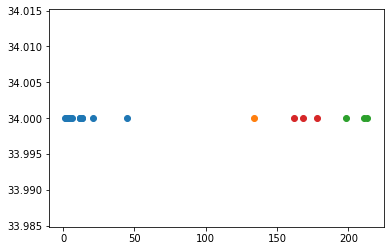

In [34]:
dataset=np.loadtxt('data.txt')
results=agens(dataset,4)

for r  in  results:
    drawpoints = []
    for points in r:
        drawpoints.append(points)
    drawdata=dataset[drawpoints]
    plt.scatter(drawdata[:, 0], drawdata[:, 1], marker='o')

plt.show()
